In [1]:
from thesis_common import *
from world_modeller_dataset import *

import matplotlib.pyplot as plt
import scipy.stats

plt.rcParams['figure.dpi'] = 125 # increase plot sizes!

In [2]:
input_size = 22
hidden_size = 11
output_size = 6

# 1. Train "Subjects" with different Activation Functions

In [3]:
tanh_subjects = []
sigmoid_subjects = []
number_of_subjects = 2
epochs = 101
lr = 0.04

for i in range(number_of_subjects):
    (w1, w2) = initialize_random_subject(input_size, hidden_size, output_size)
 
    print "************************ Subject {} **********************************".format(i)
    
    (epoch, accuracy) = train_and_test_at_intervals_clone_weights(w1, w2, epochs, lr, torch.tanh, training_scenarios, testing_scenarios_all, hidden_size)
    tanh_subjects.append((epoch,accuracy))

    (epoch, accuracy) = train_and_test_at_intervals_clone_weights(w1, w2, epochs, lr, torch.sigmoid, training_scenarios, testing_scenarios_all, hidden_size)
    sigmoid_subjects.append((epoch,accuracy))

************************ Subject 0 **********************************
Epoch: 0 loss 19.2340354919
Epoch: 0 loss 11.2836303711
************************ Subject 1 **********************************
Epoch: 0 loss 27.4213848114
Epoch: 0 loss 24.5996417999


### Get the Mean and Error for each epoch across the subjects

In [4]:
(tanh_means, tanh_stds) = get_mean_and_sems(tanh_subjects)
(sigmoid_means, sigmoid_stds) = get_mean_and_sems(sigmoid_subjects)
x = tanh_subjects[0][0]

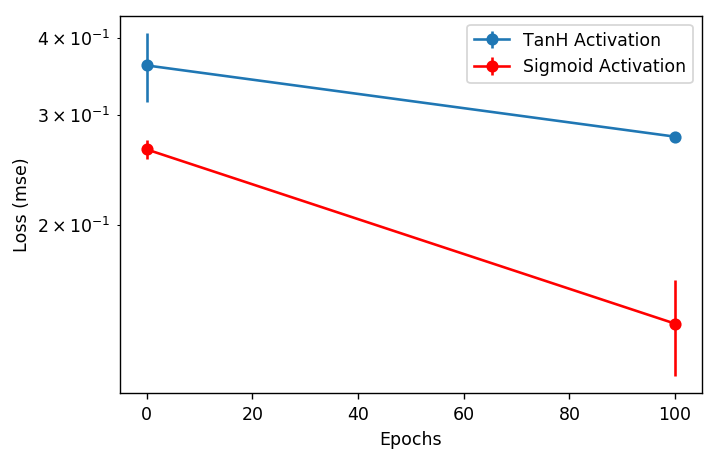

In [5]:
plt.errorbar(x, tanh_means, tanh_stds, fmt='-o', label='TanH Activation')
plt.errorbar(x, sigmoid_means, sigmoid_stds, fmt='-ro', label='Sigmoid Activation')
plt.legend()
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.show()

---
# 2. Train "Subjects" and test accuracy at differing learning rates

In [6]:
lr_subjects = {}
number_of_subjects = 2
epochs = 101

for i in range(number_of_subjects):
    (w1, w2) = initialize_random_subject(input_size, hidden_size, output_size)  

    print "************************ Subject {} **********************************".format(i)
    
    for dlr in range(1,8):
        lr = round(0.1 * dlr, 1)
        
        if lr not in lr_subjects:
            lr_subjects[lr] = []
        
        (epoch, accuracy) = train_and_test_at_intervals_clone_weights(w1, w2, epochs, lr, torch.sigmoid, testing_scenarios_all, training_scenarios, hidden_size)
        lr_subjects[lr].append((epoch,accuracy))

************************ Subject 0 **********************************
Epoch: 0 loss 20.3369998932
Epoch: 0 loss 20.989610672
Epoch: 0 loss 21.9295158386
Epoch: 0 loss 23.0138282776
Epoch: 0 loss 25.2420463562
Epoch: 0 loss 29.661491394
Epoch: 0 loss 38.8488197327
************************ Subject 1 **********************************
Epoch: 0 loss 17.2920913696
Epoch: 0 loss 17.4506587982
Epoch: 0 loss 18.4886779785
Epoch: 0 loss 19.4559421539
Epoch: 0 loss 20.4420394897
Epoch: 0 loss 21.9117259979
Epoch: 0 loss 24.5165786743


In [7]:
x = lr_subjects.itervalues().next()[0][0]

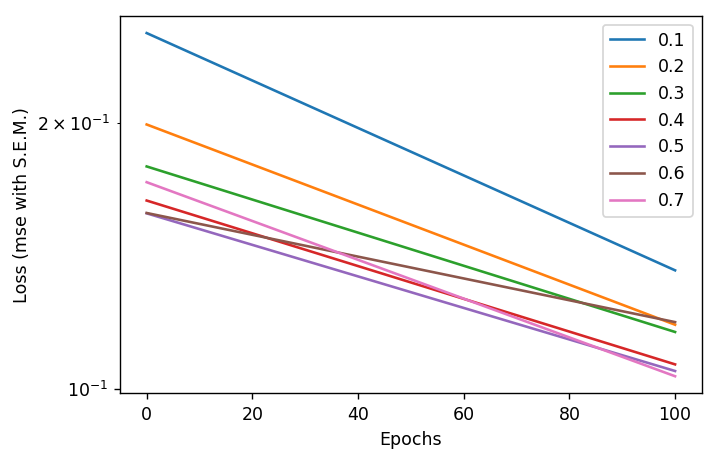

In [8]:
export_for_r_columns = [x]
for k in sorted(lr_subjects):
    (means, stds) = get_mean_and_sems(lr_subjects[k]) 
    export_for_r_columns = np.vstack((export_for_r_columns, means))
    plt.plot(x, means, label = str(k))

plt.legend()
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse with S.E.M.)')

plt.show()

# 3. Compare Inference vs No-Inference Performance
Use (0.4 LR, Sigmoid, and 800 epochs)

In [12]:
inf_subjects = []
no_inf_subjects = []
number_of_subjects = 100
epochs = 101
lr = 0.4
activation = torch.sigmoid

for i in range(number_of_subjects):
    (w1, w2) = initialize_random_subject(input_size, hidden_size, output_size)  
 
    print "************************ Subject {} **********************************".format(i)
    
    (epoch, accuracy) = train_and_test_at_intervals_clone_weights(w1, w2, epochs, lr, activation, testing_scenarios_inference_required, training_scenarios, hidden_size, 2)
    inf_subjects.append((epoch,accuracy))
    
    (epoch, accuracy) = train_and_test_at_intervals_clone_weights(w1, w2, epochs, lr, activation, testing_scenarios_no_inference_required, training_scenarios, hidden_size, 2)
    no_inf_subjects.append((epoch,accuracy))

************************ Subject 0 **********************************
Epoch: 0 loss 16.647195816
Epoch: 0 loss 16.647195816
************************ Subject 1 **********************************
Epoch: 0 loss 19.7688121796
Epoch: 0 loss 19.7688121796
************************ Subject 2 **********************************
Epoch: 0 loss 16.8307266235
Epoch: 0 loss 16.8307266235
************************ Subject 3 **********************************
Epoch: 0 loss 21.190071106
Epoch: 0 loss 21.190071106
************************ Subject 4 **********************************
Epoch: 0 loss 16.7367286682
Epoch: 0 loss 16.7367286682
************************ Subject 5 **********************************
Epoch: 0 loss 15.5810260773
Epoch: 0 loss 15.5810260773
************************ Subject 6 **********************************
Epoch: 0 loss 19.380853653
Epoch: 0 loss 19.380853653
************************ Subject 7 **********************************
Epoch: 0 loss 20.7310676575
Epoch: 0 loss 20.731067657

Epoch: 0 loss 16.9810733795
************************ Subject 65 **********************************
Epoch: 0 loss 17.8773937225
Epoch: 0 loss 17.8773937225
************************ Subject 66 **********************************
Epoch: 0 loss 21.8862438202
Epoch: 0 loss 21.8862438202
************************ Subject 67 **********************************
Epoch: 0 loss 18.5159339905
Epoch: 0 loss 18.5159339905
************************ Subject 68 **********************************
Epoch: 0 loss 16.8030815125
Epoch: 0 loss 16.8030815125
************************ Subject 69 **********************************
Epoch: 0 loss 16.4106769562
Epoch: 0 loss 16.4106769562
************************ Subject 70 **********************************
Epoch: 0 loss 18.7041282654
Epoch: 0 loss 18.7041282654
************************ Subject 71 **********************************
Epoch: 0 loss 16.0165557861
Epoch: 0 loss 16.0165557861
************************ Subject 72 **********************************
Epoch: 0 los

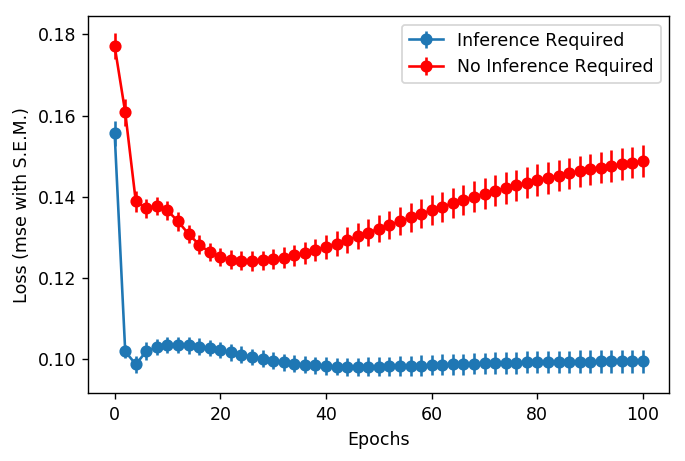

In [13]:
x = inf_subjects[0][0]
(inf_means, inf_stds) = get_mean_and_sems(inf_subjects)
(no_inf_means, no_inf_stds) = get_mean_and_sems(no_inf_subjects)

plt.errorbar(x, inf_means, inf_stds, fmt='-o', label='Inference Required')
plt.errorbar(x, no_inf_means, no_inf_stds, fmt='-ro', label='No Inference Required')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss (mse with S.E.M.)')
plt.show()

### Are these two groups significantly different (They look like it)... Perform a t-test on the last (most trained) performance

In [14]:
inf_last_losses = [subject[1][-1] for subject in inf_subjects]
no_inf_last_losses = [subject[1][-1] for subject in no_inf_subjects]

##### First let's check for normality...

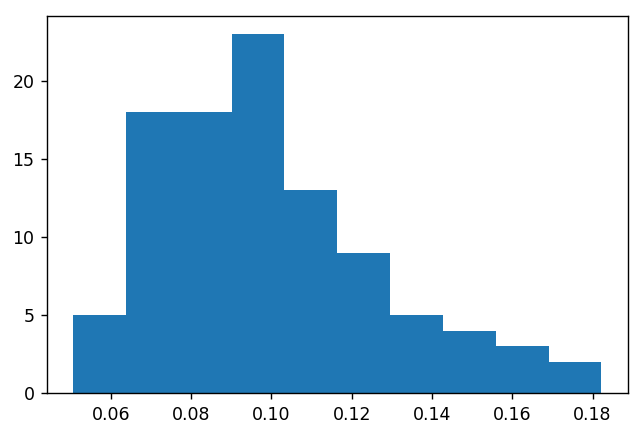

In [15]:
plt.hist(inf_last_losses)
plt.show()

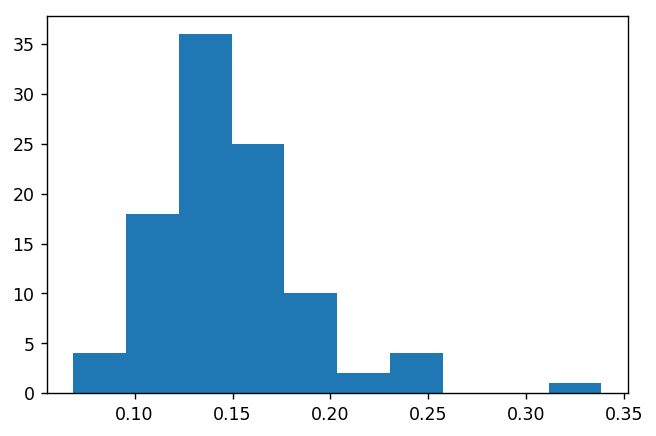

In [16]:
plt.hist(no_inf_last_losses)
plt.show()

### These histograms aren't ideal normal distributions, less test for normality explicitly a couple of ways...

In [17]:
k2, p1 = scipy.stats.normaltest(inf_last_losses)
foo, p2 = scipy.stats.jarque_bera(inf_last_losses)
print "p1 = {}, p2 = {}".format(p1, p2)

p1 = 0.00296996897852, p2 = 0.00223143601394


In [18]:
k2, p1 = scipy.stats.normaltest(no_inf_last_losses)
foo, p2 = scipy.stats.jarque_bera(no_inf_last_losses)
print "p1 = {}, p2 = {}".format(p1, p2)

p1 = 1.3187954318e-09, p2 = 0.0


### These P-values aren't super great, but the number of samples is reasonably large (>50) so t-test should be ok, we'll follow up with a couple of non parametric tests too...

In [19]:
t, p = scipy.stats.ttest_ind(inf_last_losses, no_inf_last_losses
                 , equal_var=False)

print "p = {}. t = {}".format(p, t)

p = 9.60702860905e-20. t = -10.2593287208


### A Mann Whitney U test...

In [20]:
statistic, p = scipy.stats.mannwhitneyu(inf_last_losses, no_inf_last_losses)

print "p = {}. statistic = {}".format(p, statistic)

p = 2.34006409922e-19. statistic = 1349.0


### A Wilcoxon signed rank test

In [21]:
t, p = scipy.stats.wilcoxon(inf_last_losses, no_inf_last_losses)

print "p = {}. t = {}".format(p, t)

p = 1.34893394281e-16. t = 120.0


## These tests indicate the two groups are significantly different

---
# Experiment 3 - Present the Network with an impossible physical situation

### A Useful Helper Function

In [21]:
def test_and_report(w1, w2, testing_scenarios):
    test_loss = 0
    for scenario in testing_scenarios:
        print "-------------------------"
        print "{}".format(scenario[0])
        print "-------------------------"

        context_state = Variable(torch.zeros((1, hidden_size)).type(torch.FloatTensor), requires_grad=False)
        x = Variable(torch.FloatTensor(scenario[1]), requires_grad=False)
        y = scenario[2]
        
        scenario_loss = 0
        for i in range(len(x)):
            inp = x[i:i+1]
            (output, new_context_state) = forward(inp, context_state, w1, w2, torch.sigmoid)
            context_state = Variable(new_context_state.data)
            
            prediction = output.data.numpy().ravel()[0]
            prediction_rounded = int(round(prediction))
            expected = y[i][0]
            
            event_loss = loss_measure(prediction, expected)
            scenario_loss += event_loss
            test_loss += event_loss
            
            #print "{:02d} | {:0.2f} == {} | {} | {:0.6f} {}".format(i, prediction, prediction_rounded, expected, event_loss, "" if prediction_rounded == expected else "*** MISMATCH ***")
            print "{:02d} | {:0.2f} | {} | {:0.6f} {}".format(i, prediction, expected, event_loss, "" if prediction_rounded == expected else "*** MISMATCH ***")

        print "-------------------------"
        print " * Scenario Loss: {:0.6f}".format(scenario_loss / len(x))
        print "-------------------------"
        print ""
    
    print "------------------------------------------------------------"
    print " * Total Test Loss: {:0.6f}".format(test_loss / len(testing_scenarios))
    print "------------------------------------------------------------"
    
    return test_loss / len(testing_scenarios)

### Train New Subject

In [9]:
epochs = 201
lr = 0.04
activation = torch.sigmoid

(w1, w2) = initialize_random_subject(input_size, hidden_size, output_size)
w1 = Variable(w1, requires_grad=True)
w2 = Variable(w2, requires_grad=True)
    
train(w1, w2, epochs, lr, activation, training_scenarios, hidden_size)

Epoch: 0 loss 20.6989002228


### Test on Invalid/Impossible Physical Input

In [24]:
testing_scenario_impossible = [('Impossible Physical Input - Exp 3', x_exp3_invalid, y_exp3_invalid)]

In [25]:
test_loss_impossible = test_and_report(w1, w2, testing_scenarios=testing_scenario_impossible)
test_loss_all = test_and_report(w1, w2, testing_scenarios=testing_scenarios_all)
test_loss_inf = test_and_report(w1, w2, testing_scenarios=testing_scenarios_inference_required)
test_loss_no_inf = test_and_report(w1, w2, testing_scenarios=testing_scenarios_no_inference_required)

-------------------------
Impossible Physical Input - Exp 3
-------------------------
00 | 0.56 | 0.5 | 0.003151 *** MISMATCH ***
01 | 0.55 | 0.5 | 0.002921 *** MISMATCH ***
02 | 0.07 | 0.5 | 0.182556 *** MISMATCH ***
03 | -0.99 | 0.5 | 2.231927 *** MISMATCH ***
04 | -0.16 | 0.5 | 0.439780 *** MISMATCH ***
-------------------------
 * Scenario Loss: 0.572067
-------------------------

------------------------------------------------------------
 * Total Test Loss: 2.860336
------------------------------------------------------------
-------------------------
Inference Required - Alternative 1
-------------------------
00 | 0.99 | 1 | 0.000071 
01 | 1.01 | 1 | 0.000187 
02 | 0.49 | 0.5 | 0.000030 *** MISMATCH ***
03 | -0.76 | 0 | 0.578583 *** MISMATCH ***
04 | 0.12 | 1 | 0.775688 *** MISMATCH ***
-------------------------
 * Scenario Loss: 0.270912
-------------------------

-------------------------
Inference Required - Alternative 2
-------------------------
00 | 0.99 | 1 | 0.000071 


In [26]:
print(test_loss_impossible, test_loss_all, test_loss_inf, test_loss_no_inf)

(2.8603356076462845, 0.67838722037370502, 0.7033274674676645, 0.65344697327974577)


## Difference seems quite significant... run across subjects...

In [27]:
poss_subjects = []
imposs_subjects = []
number_of_subjects = 100
epochs = 101
lr = 0.4
activation = torch.sigmoid

for i in range(number_of_subjects):
    (w1, w2) = initialize_random_subject(input_size, hidden_size, output_size)  
 
    print "************************ Subject {} **********************************".format(i)
    
    (epoch, accuracy) = train_and_test_at_intervals_clone_weights(w1, w2, epochs, lr, activation, testing_scenarios_all, training_scenarios, hidden_size, 2)
    poss_subjects.append((epoch,accuracy))
    
    (epoch, accuracy) = train_and_test_at_intervals_clone_weights(w1, w2, epochs, lr, activation, testing_scenario_impossible, training_scenarios, hidden_size, 2)
    imposs_subjects.append((epoch,accuracy))

************************ Subject 0 **********************************
Epoch: 0 loss 21.3634529114
Epoch: 0 loss 21.3634529114
************************ Subject 1 **********************************
Epoch: 0 loss 18.024433136
Epoch: 0 loss 18.024433136
************************ Subject 2 **********************************
Epoch: 0 loss 17.4714202881
Epoch: 0 loss 17.4714202881
************************ Subject 3 **********************************
Epoch: 0 loss 18.6410179138
Epoch: 0 loss 18.6410179138
************************ Subject 4 **********************************
Epoch: 0 loss 22.1709918976
Epoch: 0 loss 22.1709918976
************************ Subject 5 **********************************
Epoch: 0 loss 18.2233505249
Epoch: 0 loss 18.2233505249
************************ Subject 6 **********************************
Epoch: 0 loss 18.6278839111
Epoch: 0 loss 18.6278839111
************************ Subject 7 **********************************
Epoch: 0 loss 21.8810577393
Epoch: 0 loss 21.88105

Epoch: 0 loss 19.3997039795
************************ Subject 65 **********************************
Epoch: 0 loss 20.918888092
Epoch: 0 loss 20.918888092
************************ Subject 66 **********************************
Epoch: 0 loss 16.2144298553
Epoch: 0 loss 16.2144298553
************************ Subject 67 **********************************
Epoch: 0 loss 21.3543663025
Epoch: 0 loss 21.3543663025
************************ Subject 68 **********************************
Epoch: 0 loss 16.4972476959
Epoch: 0 loss 16.4972476959
************************ Subject 69 **********************************
Epoch: 0 loss 19.3333587646
Epoch: 0 loss 19.3333587646
************************ Subject 70 **********************************
Epoch: 0 loss 15.4339017868
Epoch: 0 loss 15.4339017868
************************ Subject 71 **********************************
Epoch: 0 loss 18.0109062195
Epoch: 0 loss 18.0109062195
************************ Subject 72 **********************************
Epoch: 0 loss 

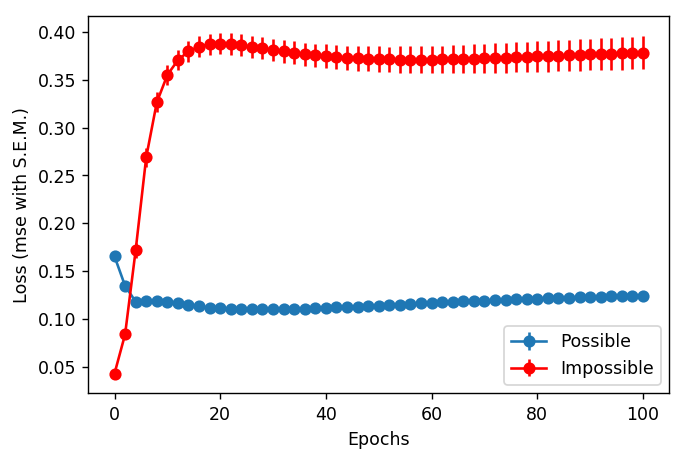

In [28]:
x = poss_subjects[0][0]
(poss_means, poss_stds) = get_mean_and_sems(poss_subjects)
(imposs_means, imposs_stds) = get_mean_and_sems(imposs_subjects)

plt.errorbar(x, poss_means, poss_stds, fmt='-o', label='Possible')
plt.errorbar(x, imposs_means, imposs_stds, fmt='-ro', label='Impossible')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss (mse with S.E.M.)')
plt.show()

### Examine these results statistically as above

In [30]:
poss_last_losses = [subject[1][-1] for subject in poss_subjects]
imposs_last_losses = [subject[1][-1] for subject in imposs_subjects]

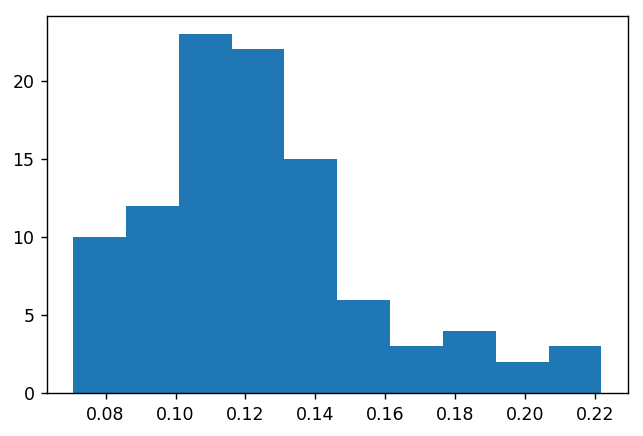

In [32]:
plt.hist(poss_last_losses)
plt.show()

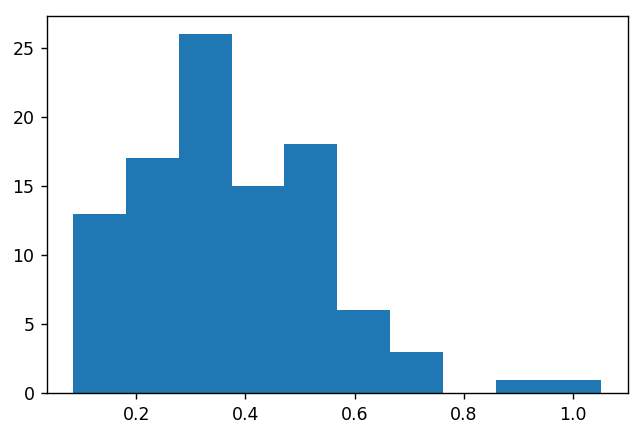

In [33]:
plt.hist(imposs_last_losses)
plt.show()

In [34]:
k2, p1 = scipy.stats.normaltest(poss_last_losses)
foo, p2 = scipy.stats.jarque_bera(poss_last_losses)
print "p1 = {}, p2 = {}".format(p1, p2)

p1 = 5.12910946985e-05, p2 = 4.71257739942e-06


In [35]:
k2, p1 = scipy.stats.normaltest(imposs_last_losses)
foo, p2 = scipy.stats.jarque_bera(imposs_last_losses)
print "p1 = {}, p2 = {}".format(p1, p2)

p1 = 1.79180338258e-05, p2 = 1.00074711407e-07


### A T-Test to check if they're significantly different

In [36]:
t, p = scipy.stats.ttest_ind(poss_last_losses, imposs_last_losses
                 , equal_var=False)

print "p = {}. t = {}".format(p, t)

p = 3.79512898043e-27. t = -14.6101442833


---
# EXPERIMENTAL - May Not Run... Inspect Individual Network

In [28]:
def test_and_plot_losses(w1, w2, testing_scenarios):
    longest = max(testing_scenarios, key=lambda coll: len(coll[1]))
    x_axis = np.arange(len(longest[1]))
    
    for scenario in testing_scenarios:
        context_state = Variable(torch.zeros((1, hidden_size)).type(torch.FloatTensor), requires_grad=False)
        x = Variable(torch.FloatTensor(scenario[1]), requires_grad=False)
        y = scenario[2]
        
        event_losses = []
        for i in range(len(x)):
            inp = x[i:i+1]
            (output, new_context_state) = forward(inp, context_state, w1, w2, torch.sigmoid)
            context_state = Variable(new_context_state.data)
            
            prediction = output.data.numpy().ravel()[0]
            expected = y[i][0]
            
            event_losses.append(loss_measure(prediction, expected))
            
        plt.plot(x_axis[:(len(event_losses))], event_losses, label=scenario[0])
    
    plt.yscale('log')
    plt.legend()
    plt.show()

### 1. Train

In [29]:
epochs = 200
lr = 0.04
activation = torch.sigmoid

(w1, w2) = initialize_random_subject()
w1 =  Variable(w1, requires_grad=True)
w2 =  Variable(w2, requires_grad=True)
    
train(w1, w2, epochs, lr, activation)

Epoch: 0 loss 24.4576854706


### 2. Test the Network (w1, w2) on Non Inference Req

In [30]:
test_and_report(w1, w2, testing_scenarios_no_inference_required)

-------------------------
No Inference Required - Consistent
-------------------------
00 | 0.99 == 1 | 1 | 0.000033 
01 | 0.84 == 1 | 1 | 0.024772 
02 | 0.31 == 0 | 1 | 0.479683 *** MISMATCH ***
03 | -0.58 == -1 | 1 | 2.483390 *** MISMATCH ***
04 | 0.33 == 0 | 0 | 0.108108 
-------------------------
 * Scenario Loss: 0.619197
-------------------------

-------------------------
No Inference Required - Inconsistent
-------------------------
00 | 0.99 == 1 | 1 | 0.000033 
01 | 0.46 == 0 | 1 | 0.291828 *** MISMATCH ***
02 | 0.29 == 0 | 1 | 0.502351 *** MISMATCH ***
03 | 0.52 == 1 | 1 | 0.229230 
04 | 0.29 == 0 | 0 | 0.082880 
-------------------------
 * Scenario Loss: 0.221264
-------------------------

------------------------------------------------------------
 * Total Test Loss: 2.101154
------------------------------------------------------------


### 3. Test the Network on Inference Required

In [100]:
test_and_report(w1, w2, testing_scenarios_inference_required)

-------------------------
Scenario 1 - Consistent
-------------------------
00 | 1.01 == 1 | 1 | 0.000036 
01 | 0.99 == 1 | 1 | 0.000031 
02 | 1.00 == 1 | 1 | 0.000011 
03 | 1.00 == 1 | 1 | 0.000001 
04 | 1.06 == 1 | 1 | 0.003553 
05 | 1.04 == 1 | 1 | 0.001298 
06 | 1.00 == 1 | 1 | 0.000001 
07 | 1.20 == 1 | 1 | 0.039074 
-------------------------
 * Scenario Loss: 0.005501
-------------------------

-------------------------
Scenario 1 - Inconsistent
-------------------------
00 | 1.01 == 1 | 1 | 0.000036 
01 | 0.99 == 1 | 1 | 0.000031 
02 | 1.00 == 1 | 1 | 0.000011 
03 | 1.00 == 1 | 1 | 0.000001 
04 | 1.06 == 1 | 1 | 0.003553 
05 | 1.04 == 1 | 1 | 0.001298 
06 | 1.00 == 1 | 1 | 0.000001 
07 | 1.04 == 1 | 0 | 1.073748 *** MISMATCH ***
-------------------------
 * Scenario Loss: 0.134835
-------------------------

-------------------------
Scenario 2 - Consistent
-------------------------
00 | 1.01 == 1 | 1 | 0.000036 
01 | 0.99 == 1 | 1 | 0.000031 
02 | 1.00 == 1 | 1 | 0.000011 
03 | 

### 4. Test consistent scenarios, Inf vs No Inf, Show Error Progression

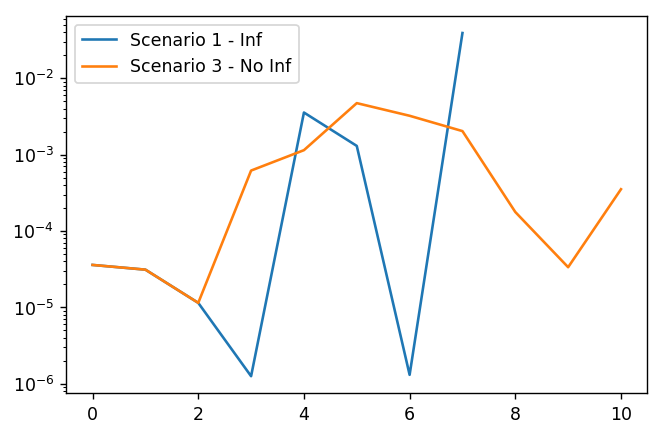

In [101]:
s = [('Scenario 1 - Inf', xS1Con, yS1Con),
     ('Scenario 3 - No Inf', xS3Con, yS3Con)]

test_and_plot_losses(w1, w2, s)

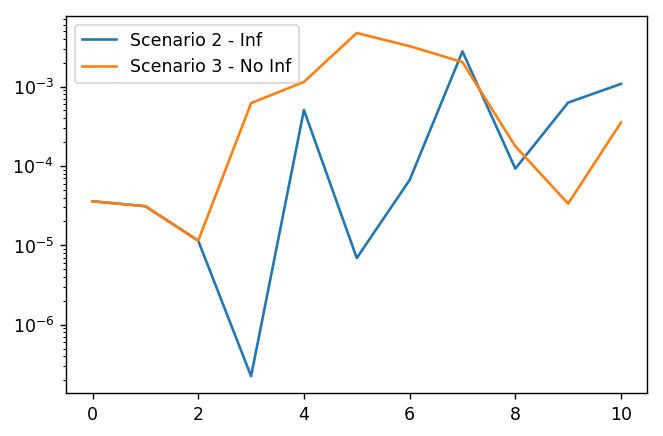

In [102]:
s = [('Scenario 2 - Inf', xS2Con, yS2Con),
     ('Scenario 3 - No Inf', xS3Con, yS3Con)]

test_and_plot_losses(w1, w2, s)